# <center>"Plug and Play" Method for Stock Market Analysis Project</center>
<br>

This portofolio project is designed to look at data from the stock market, the default examples below are tech stocks. Notes are included on how to change the stocks to your liking in order to compare your favorite companies on the fly! Look out for __!Plug and Play!__ sections and make sure to read the notes included. 

#### Basic Instructions
 1.) Once you have gone through each plug'n'play section, click on the "Cell" dropdown menu in Jupyter and click on "Run All".
 <br>
 2.) Choose at LEAST 2 stocks and NO MORE than 4.
 <br>
 3.) You will need basic knowledge of utilizing Jupyter Notebook with Python when downloading this file.
<br>
<br>
If you are anything like me, when it comes to the Stock Market and making decisions on where to even begin investment, I'm a "show me the numbers" and data kind of person. Ideally one could hire a broker to help you out or go by 'feeling', but I like to tinker on my own and this project can be used to help visualize your chosen stocks over time before really jumping in.
<br>
<br>
This project is adapted from Jose Portilla's online Python course and converted for the latest version of Python 3. Pandas is primarily used to pull stock information from the web, followed by visualizations. More importantly, there are several ways demonstrated on analyzing the risk of your chosen stock based on performance over time.
<br>
<br>
One final method is used to predict how the stock(s) may behave in the future, which can be handy if you are trying to make informed decisions. Ideally before making any kind of investment, I would recommend also reading some literature on the stock market beforehand such as __[One Up On Wall Street: How To Use What You Already Know To Make Money in The Market](https://www.amazon.com/gp/product/0743200403)__ by Peter Lynch.

### This project is designed to answer the following questions:

 * What was the change in price of the stock over time?
 * What was the daily return of the stock on average?
 * What was the moving average of the various stocks?
 * What was the correlation between different stocks' closing prices?
 * What was the correlation between different stocks' daily returns?
 * How much value do we put at risk by investing in a particular stock?
 * How can we attempt to predict future stock behavior?

### <center>Basic Analysis of Stock Information Over Time</center>

This section handles requesting stock information and reading data from Yahoo and show basic exploratory data analysis.

In [208]:
# Import Code
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Import Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Reads stock data from Yahoo Finance website
from pandas_datareader import data, wb

# For displaying time stamp info
from datetime import datetime

# For division
from __future__ import division

__!Plug and Play Section!__

The "tech_list" below can include any stocks you want, but you need the correct abbreviation "symbol" code. Head over to [Yahoo Finance](https://finance.yahoo.com/) to search for the symbol codes you need and replace the list below (ideally you should include at least two).

In [209]:
# Replace stocks here as needed, make sure to place the symbol code 
# between the single quotations and separate with commas 
# if using multiple stocks.

# tech_list dataframe object that will hold the desired stock data
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# This sets up 'End' and 'Start' times for data to grab
# 'End' time is the current day
# 'Start' is how far to go back (goes back 1 year, but can be changed to go back further)

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

# For loop for the tech_list dataframe that grabs yahoo data
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

__!Plug and Play Section!__

In [210]:
# Summarizes Stats for one chosen Company
# Change 'SymbolCode' (i.e. GOOG) to any stock in your list

GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,2554.764756,2509.898165,2531.556914,2533.360159,1.253329e+06,2533.360159
std,353.694319,352.103010,354.930840,352.965433,4.859925e+05,352.965433
min,1756.000000,1721.550049,1738.189941,1736.189941,5.933000e+05,1736.189941
25%,2279.493713,2250.320984,2262.382446,2262.837463,9.295500e+05,2262.837463
50%,2632.483521,2593.599976,2611.280029,2615.584961,1.135450e+06,2615.584961
75%,2883.400024,2823.952515,2850.277588,2848.855042,1.417400e+06,2848.855042
max,3037.000000,2997.750000,3020.000000,3014.179932,4.118200e+06,3014.179932


__!Plug and Play Section!__

In [211]:
# General Info for one chosen Company
# Change 'SymbolCode' (i.e. GOOG) to any stock in your list

GOOG.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-01-11 to 2022-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    int64  
 5   Adj Close  254 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


__!Plug and Play Section!__

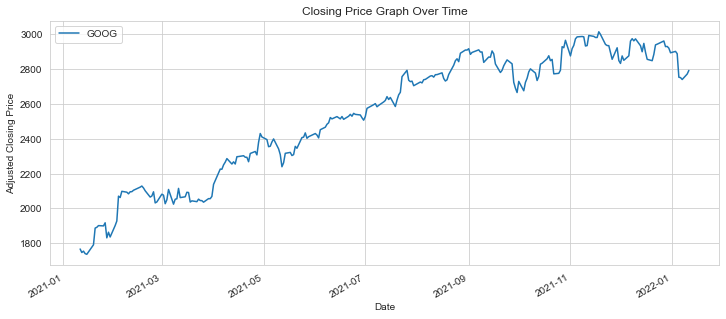

In [212]:
# Plot graph for showing closing price of the stock
# over the time period specified
# Change 'SymbolCode' (i.e. GOOG) to any stock in your list

GOOG['Adj Close'].plot(legend=True,figsize=(12,5),label='GOOG')
## Uncomment by deleting "#" below in front of each symbol code 
## to compare any other stocks in your list
#AAPL['Adj Close'].plot(legend=True,figsize=(12,5),label='AAPL')
#MSFT['Adj Close'].plot(legend=True,figsize=(12,5),label='MSFT')
#AMZN['Adj Close'].plot(legend=True,figsize=(12,5),label='AMZN')

# Plot Labels
plt.ylabel('Adjusted Closing Price');
plt.title('Closing Price Graph Over Time');

__!Plug and Play Section!__

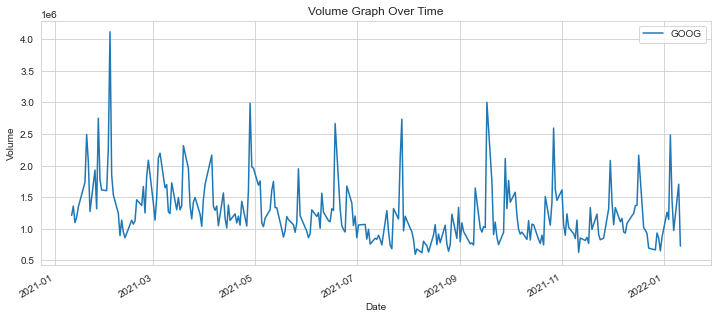

In [213]:
# Plot graph for showing volume of the stock
# over the time period specified
# Change 'SymbolCode' (i.e. GOOG) to any stock in your list
GOOG['Volume'].plot(legend=True,figsize=(12,5),label='GOOG');

# Plot Labels
plt.ylabel('Volume');
plt.title('Volume Graph Over Time');

__Moving Average Calculation__

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


__!Plug and Play Section!__

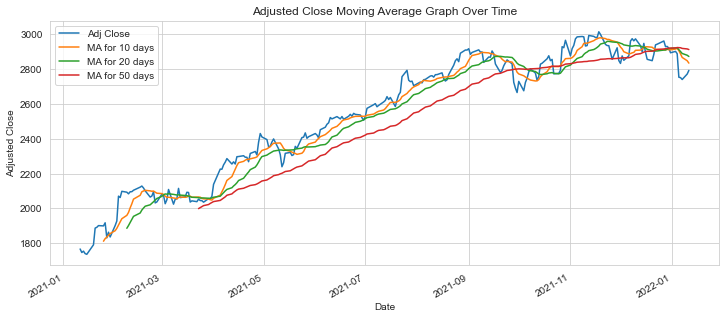

In [214]:
# Plotting number of days in moving average
# Change ALL 3 'SymbolCode' (i.e. GOOG) to any same stock in your list

# Days dataframe
ma_day = [10,20,50]

# For loop for ma_day
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    GOOG[column_name] = DataFrame.rolling(GOOG['Adj Close'],ma).mean()
    
# Pass list of column names
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5));

# Plot Labels
plt.ylabel('Adjusted Close');
plt.title('Adjusted Close Moving Average Graph Over Time');

### <center>Daily Return Analysis Section</center>

__!Plug and Play Section!__

This section's primary purpose is to analyze risk by looking at daily changes of a stock.

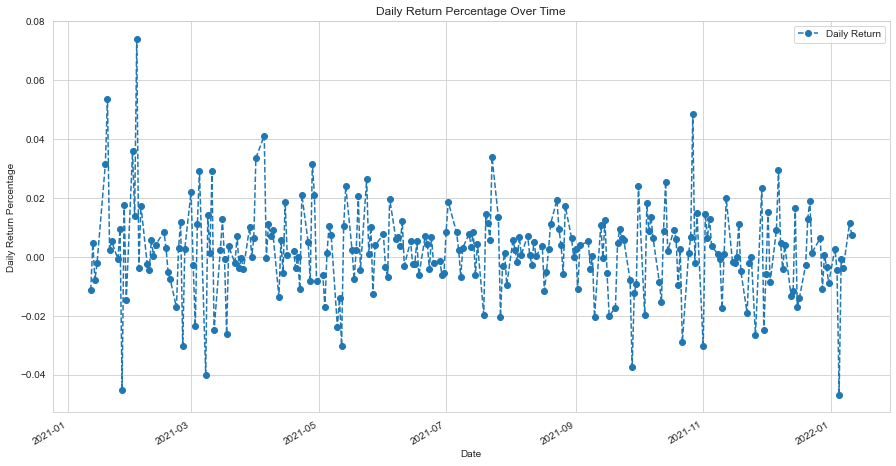

In [215]:
# Change ALL 3 'SymbolCode' (i.e. GOOG) to any same stock in your list

# Find percent change for each day
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

# Plotting the daily return percentage over time
GOOG['Daily Return'].plot(figsize=(15,8),legend=True,linestyle='--',marker='o')

# Plot Labels
plt.ylabel('Daily Return Percentage');
plt.title('Daily Return Percentage Over Time');

__!Plug and Play Section!__

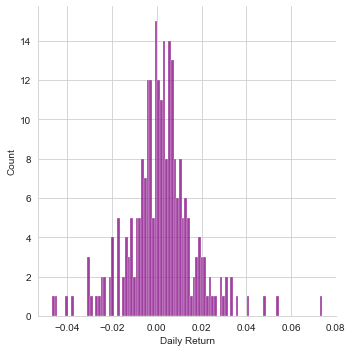

In [216]:
# Change 'SymbolCode' (i.e. GOOG) to stock you have been analyzing

# Plotting the Average Daily Return using a Histogram
sns.displot(GOOG['Daily Return'].dropna(),bins=100,color = 'purple');

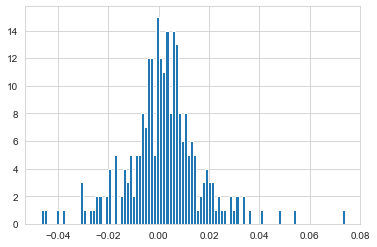

In [217]:
# Change 'SymbolCode' (i.e. GOOG) to stock you have been analyzing

# Alternately plotting with a histogram
GOOG['Daily Return'].hist(bins=100);

Now to analyze returns of all stocks in our finance dataframe, and combine into a new dataframe.

In [218]:
# Creates new Dataframe object by combining how many stocks you have in your "tech_list"
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']
# A Quick Look at the combined data
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-01-11,128.189728,1766.719971,215.682098,3114.209961
2021-01-12,128.010849,1746.550049,213.143356,3120.830078
2021-01-13,130.088028,1754.400024,214.541641,3165.889893
2021-01-14,128.120163,1740.180054,211.249252,3127.469971
2021-01-15,126.361015,1736.189941,210.882309,3104.250000


In [219]:
# Makes another new dataframe by combining closing price dataframe with daily percent change
tech_rets = closing_df.pct_change()
# A quick look at the combined data
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-01-11,NaN,NaN,NaN,NaN
2021-01-12,-0.001395,-0.011417,-0.011771,0.002126
2021-01-13,0.016227,0.004495,0.006560,0.014438
2021-01-14,-0.015127,-0.008105,-0.015346,-0.012136
2021-01-15,-0.013730,-0.002293,-0.001737,-0.007425


__!Plug and Play Section!__

This section is designed to use a jointplot to compare the return of two stocks in order to see how they might correlate. Initially we compare one stock against itself, and then two to determine correlation. If two stocks are perfectly/positively correlated with each other a *linear* relationship between daily returns will show.

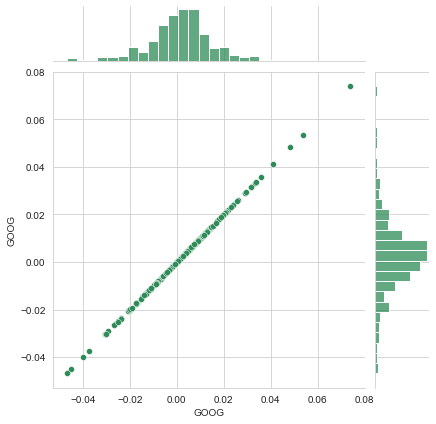

In [220]:
# Change 'SymbolCode' (i.e. GOOG) on x and y to any two stocks on your list

# First compares one stock against itself.
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind = 'scatter', color = 'seagreen');

__!Plug and Play Section!__

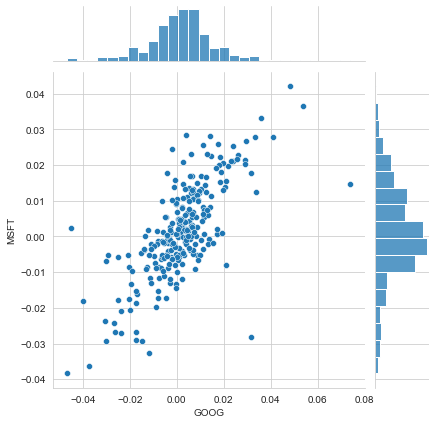

In [221]:
# Change 'SymbolCode' (i.e. GOOG) on x and y to any one stock on your list

# Now compare two stocks
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind = 'scatter');

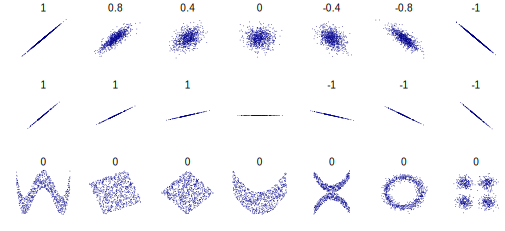

In [222]:
# Quick reference cheet sheet image to show correlation coefficient visualized
# Indicates strength of correlation and direction

from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

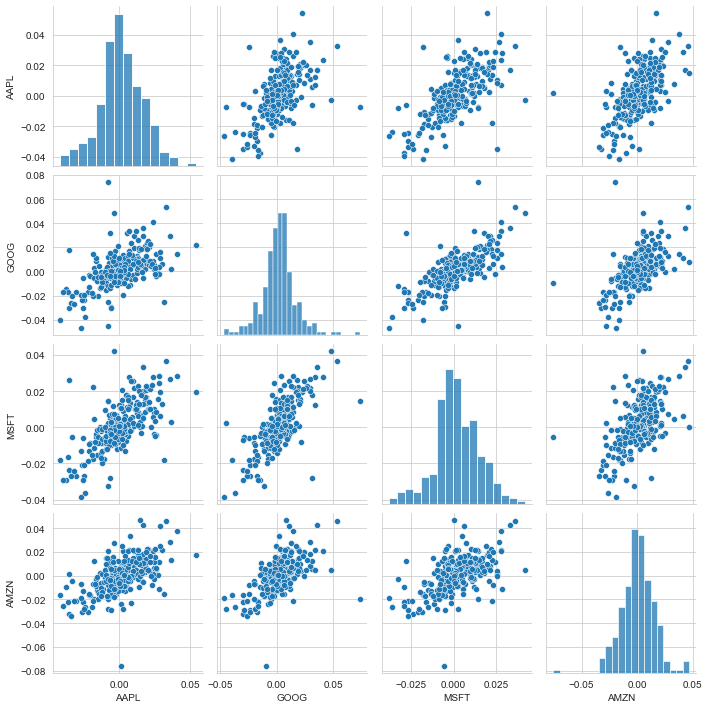

In [223]:
# Call a pairplot on combined data frame to repeat above analysis
# for every combination of stocks in list

# Pair Plots to show quick glance of any interesting correlations, if there any
# could be worth investigating that relationship
sns.pairplot(tech_rets.dropna());

In [224]:
# Quickly show again daily return percentages over last 5 days
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-01-11,NaN,NaN,NaN,NaN
2021-01-12,-0.001395,-0.011417,-0.011771,0.002126
2021-01-13,0.016227,0.004495,0.006560,0.014438
2021-01-14,-0.015127,-0.008105,-0.015346,-0.012136
2021-01-15,-0.013730,-0.002293,-0.001737,-0.007425


Analyzing any correlation of the closing price instead using the same technique and a new dataframe for returns. Unleash the power of seaborn!

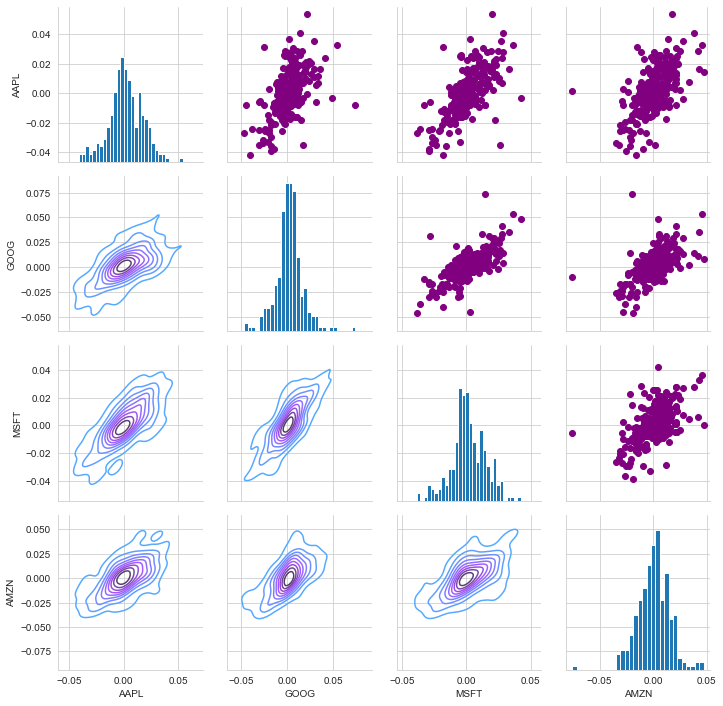

In [225]:
# Name figure as returns_fig, call PairGrid on DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Use map_upper to specify what the triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# Define lower triangle in figure, type of plot, and color
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define diagonal as a series of hisogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30);

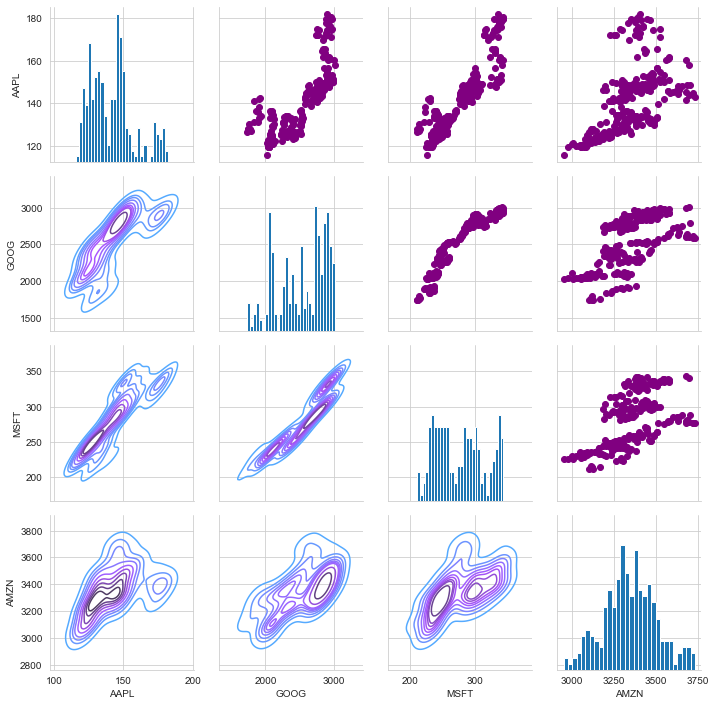

In [226]:
# Using the same technique above, except on the closing price dataframe.

# Call pairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Use map_upper to specify what the triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# Define lower triangle in figure, type of plot, and color
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define diagonal as a series of hisogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30);

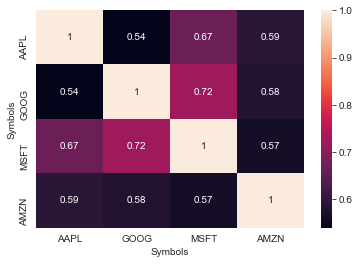

In [227]:
# Correlation plot to see actual numbers paired with a visual heatmap.

# Calls heatmap on closing price dataframe to find any correlation for daily returns percentage
# Note: Higher the percentage the better
sns.heatmap(tech_rets.dropna().corr(),annot=True);

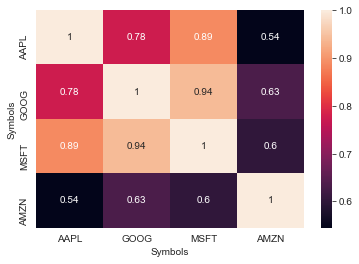

In [228]:
# Correlation plot to see actual numbers paired with a visual heatmap.

# Calls heatmap on just the closing price dataframe to find any correlation
# Note: Higher the percentage the better
sns.heatmap(closing_df.corr(),annot=True);

### <center>Risk Analysis Section</center>

This section is to show how risk is quantified, and the basic way to show this is by using daily percentage returns and compare expected return with a standard deviation of daily returns. Standard Deviation being the measure of variation or dispersion for the set of our values.

Low = Values tend to be closer to the mean (expected value)
<br>
High = Values are spread out over a wider range

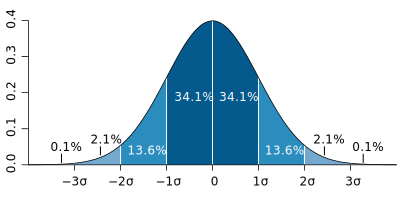

In [229]:
from IPython.display import SVG
SVG(url='https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg')

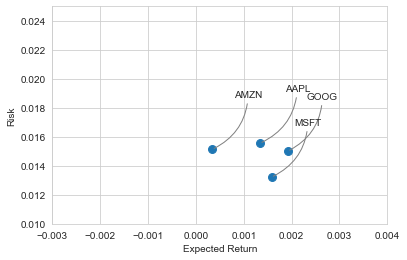

In [230]:
# New Dataframe to clean data of original tech_rets Dataframe
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

# Plot labels for x and y axis
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plot
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color ="0.5",
                          connectionstyle = 'arc3,rad=-0.3'))

__Risk Analysis Definitions__

Value At Risk = Amount of money we could lose for a given confidence interval

Value at Risk "Bootstrap Method" = Calculation of Empirical quantiles from a histogram of daily returns.

__!Plug and Play Section!__

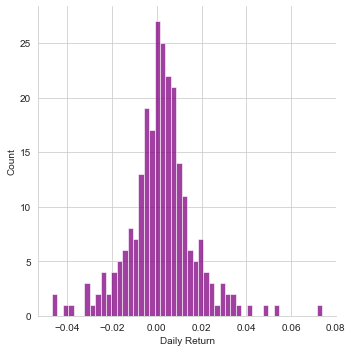

In [231]:
# Change 'SymbolCode' (i.e. GOOG) on one stock in list

# Repeat calling of earlier histogram, but using dropna for NaN values
sns.displot(GOOG['Daily Return'].dropna(),bins=50,color='purple');

In [232]:
# Quick look at rets
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-01-12,-0.001395,-0.011417,-0.011771,0.002126
2021-01-13,0.016227,0.004495,0.006560,0.014438
2021-01-14,-0.015127,-0.008105,-0.015346,-0.012136
2021-01-15,-0.013730,-0.002293,-0.001737,-0.007425
2021-01-19,0.005427,0.031489,0.017823,0.005319


__!Plug and Play Section!__

In [233]:
# Change 'SymbolCode' (i.e. GOOG) for one stock of your choice in tech_list

# Using 0.05 empirical quantile of daily returns
rets['GOOG'].quantile(0.05)

-0.023710748607715958

Depending on value you get will determine the "worst" possible daily loss exceeding a specific amount with 95% confidence. This example uses Google stocks, and at the time this was ran again on 1/11/2022, the 0.05 empirical quantile of daily returns is -0.024. This means the worst daily loss will not exceed 2.4%.  If you have a 1,000 dollar investment, the one day 5% VaR is 0.024*1000 = $24.
<br>
<br>
The Math: EQ x Investment = Worst Daily Loss
<br>
<br>

In [244]:
#Automatic calculation, replace GOOG and 1000 with total investment
rets['GOOG'].quantile(0.05)*1000

-23.710748607715956

__Risk Analysis Definitions__

Value At Risk "Monte Carlo Method" = Uses geometric brownian motion, the stock price follows a random walk and is consistent with a weak form of the efficient market hypothesis (past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.
<br>
<br>
This means past info on the price of a stock is independent of where the stock price will be in the future (its not a perfect prediction).
<br>
<br>
$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$
<br>
<br>
S = Stock Price
<br>
mu = Expected Return
<br>
sigma = Standard Deviation
<br>
t = Time
<br>
episolon = Random Variable
<br>
<br>

Multiply both sides by the stock price to rearrange formula and solve for the stock price:
<br>
<br>
$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 
<br>
<br>
First term is known as "drift" (average daily return X change of time).
<br>
<br>
Second term is known as "shock" (for each time period of stock will drift, then experience shock will randomly push the stock price up or down, simulating series of drifts and shock thousands of times to create a simulation)

__!Plug and Play Section!__

In [235]:
# Change 'SymbolCode' (i.e. GOOG) for one stock of your choice in tech_list

#Using Monte Carlo Method on your chosen stock.
# Time Horizon (1 Year)
days = 365

# Delta of Time Horizon
dt = 1/days

# Drift from expected return data
mu = rets.mean()['GOOG']

# Volatility of the stock from STD of average return
sigma = rets.std()['GOOG']

In [236]:
# Monte Carlo Function
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Define Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # For Loop Price Array for Number of Days
    for x in range(1,days):
        
        # Shock Calculated
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        # Drift Calculated
        drift[x] = mu * dt
        
        # Price Calculated
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [237]:
# Quick look at one stock again
# The Other stocks should look the same at this point, if you wish to look
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-01-11,1794.314941,1760.520020,1786.069946,1766.719971,1209700,1766.719971,NaN,NaN,NaN,NaN
2021-01-12,1778.040039,1725.310059,1753.920044,1746.550049,1357000,1746.550049,NaN,NaN,NaN,-0.011417
2021-01-13,1765.035034,1738.010010,1738.579956,1754.400024,1094100,1754.400024,NaN,NaN,NaN,0.004495
2021-01-14,1775.010010,1733.400024,1753.619995,1740.180054,1179500,1740.180054,NaN,NaN,NaN,-0.008105
2021-01-15,1756.000000,1721.550049,1738.189941,1736.189941,1342200,1736.189941,NaN,NaN,NaN,-0.002293


__!Plug and Play Section!__

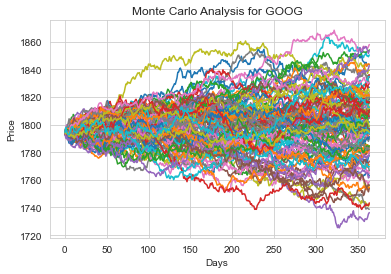

In [238]:
# Adjust start_price based on finding for current day high price.
# Adjust title name for chosen stock (i.e. GOOG)

# Start price from .head in line 185

start_price = 1794.31

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

# Label the Plot
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for GOOG');

In [239]:
# Simulation for number of runs

# Set a large number here
runs = 10000

# Empty Matrix to hold the end price data
simulations = np.zeros(runs)

# Set print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

# For loop setting simulation data point as the last stock price for that run
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

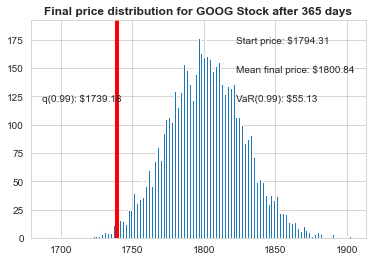

In [240]:
# Plot a histogram after the array of simulations runs and uses a quantile to define risk
# for chosen stock

# Define Q as 1% Quantile, meaning 99% of values fall in this Quantile
q = np.percentile(simulations,1)

# Plot Distribution of End Prices
plt.hist(simulations,bins=200)

# Starting price
plt.figtext(0.6,0.8, s ="Start price: $%.2f" %start_price)
# Mean Ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price within 99% confidence interval
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" %(start_price - q,))

# Display 1% quantile
plt.axvline(x=q,linewidth=4,color='r')

# Display a line at the 1% quantile result
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Title
plt.title(u"Final price distribution for GOOG Stock after %s days" %days, weight='bold');

The result should show a 1% empirical quantile of final price distribution that estimates Value at Risk for chosen stock, which in the current example is at $54.39 for every investment of the start price 1794.31.
<br>
<br>
In this example, for every GOOG stock purchase at the current date, one would put 54.39 at risk 99% of the time.